# Supervised learning with scikit-learn

In [1]:
import numpy as np
import pandas as pd

### Classification

In [11]:
df_classification = pd.read_json('classification.json')

In [12]:
df_classification.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
df_classification.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [25]:
df_classification.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

### Separate features and labels

In [16]:
X = df_classification.drop('Outcome', axis=1)
y = df_classification['Outcome'].values

### Split dataset

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Feature scaling

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train))

In [27]:
X_test = pd.DataFrame(scaler.transform(X_test))

### Create logistic regression model

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [60]:
model = LogisticRegression()
model_2 = SVC()

### Train the model

In [61]:
model.fit(X_train, y_train)
model_2.fit(X_train, y_train)

SVC()

In [62]:
train_pred_lr = model.predict(X_train)
test_pred_lr = model.predict(X_test)

train_pred_svm = model_2.predict(X_train)
test_pred_svm = model_2.predict(X_test)

### Evaluate the trained model

In [63]:
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_train, train_pred_lr)
print(f"Training Accuracy: {acc_train}")

acc_test = accuracy_score(y_test, test_pred_lr)
print(f"Validation Accuracy: {acc_test}")

Training Accuracy: 0.7785016286644951
Validation Accuracy: 0.7467532467532467


In [65]:
acc_train = accuracy_score(y_train, train_pred_svm)
print(f"Training Accuracy: {acc_train}")

acc_test = accuracy_score(y_test, test_pred_svm)
print(f"Validation Accuracy: {acc_test}")

Training Accuracy: 0.8469055374592834
Validation Accuracy: 0.7142857142857143


### Classification report

In [72]:
from sklearn.metrics import classification_report

print(classification_report(y_test, test_pred_lr))
print(classification_report(y_test, test_pred_svm))

              precision    recall  f1-score   support

           0       0.73      0.89      0.80        88
           1       0.79      0.56      0.65        66

    accuracy                           0.75       154
   macro avg       0.76      0.72      0.73       154
weighted avg       0.75      0.75      0.74       154

              precision    recall  f1-score   support

           0       0.69      0.91      0.78        88
           1       0.79      0.45      0.58        66

    accuracy                           0.71       154
   macro avg       0.74      0.68      0.68       154
weighted avg       0.73      0.71      0.70       154



Features and the Importance Score:


<AxesSubplot:>

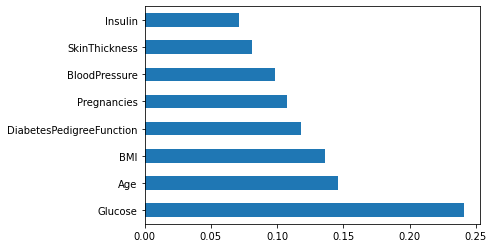

In [56]:
# To Import Class ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier

# For the List of Features
features = list(X.columns)
#print('List of Features:')
#print(features)
#print('')

# To Perform Feature Importance with Extra Trees Classifier
model = ExtraTreesClassifier()
model.fit(X, y)

# To Show the Results of Feature Importance
importance = model.feature_importances_
#print('Importance Score: %s' % importance)
#print('')

print('Features and the Importance Score:')
list(zip(features, importance))

feat_importances1 = pd.Series(importance, index=features)
feat_importances1 = feat_importances1.nlargest(8)
feat_importances1.plot(kind='barh')

In [85]:
import shap

In [90]:
explainer = shap.Explainer(model, X_train, feature_names=X.columns)
shap_values = explainer(X_test)

In [91]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

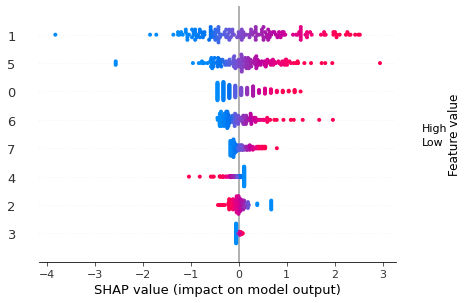

In [100]:
shap.plots.beeswarm(shap_values)

In [106]:
pd.Series(X.columns)

0                 Pregnancies
1                     Glucose
2               BloodPressure
3               SkinThickness
4                     Insulin
5                         BMI
6    DiabetesPedigreeFunction
7                         Age
dtype: object

In [108]:
pd.Series(X.columns)[[1, 5, 0, 7]]

1        Glucose
5            BMI
0    Pregnancies
7            Age
dtype: object